Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


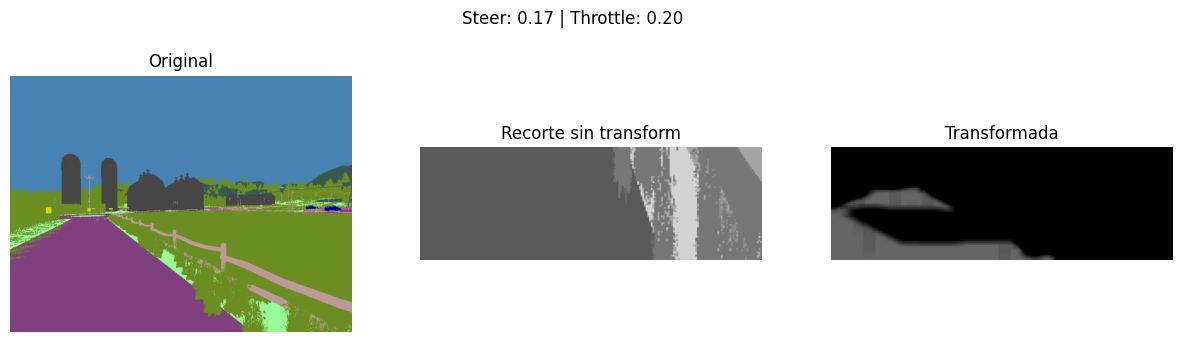

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


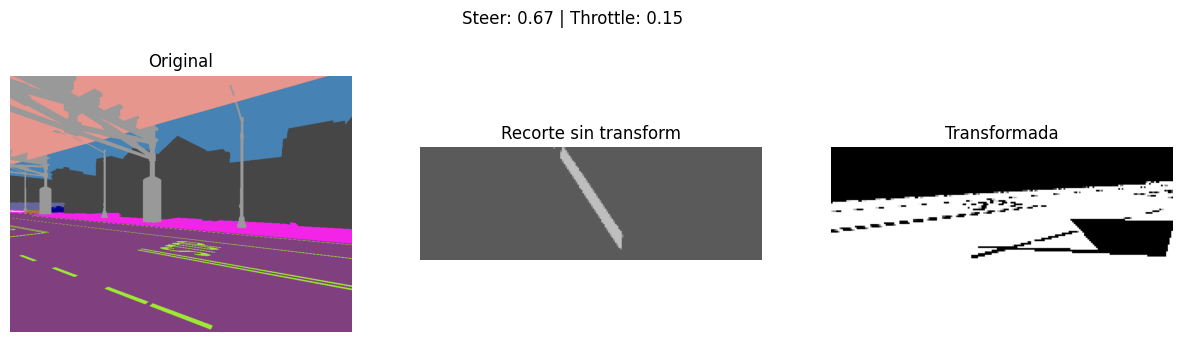

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


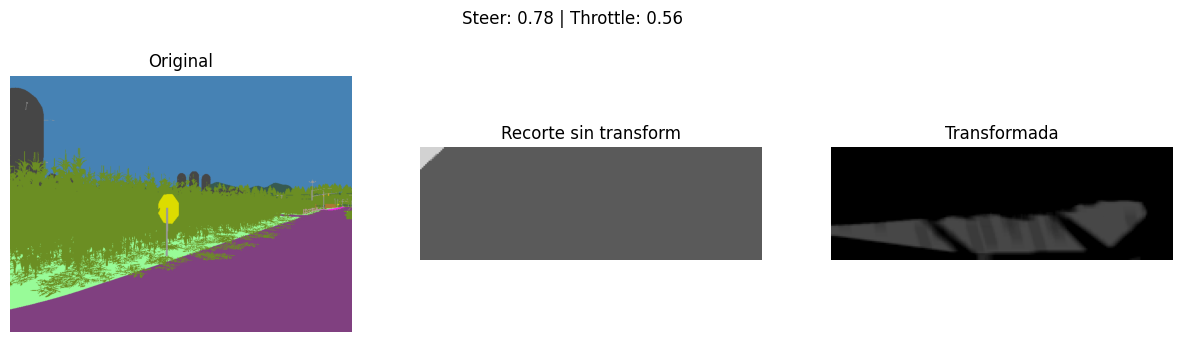

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


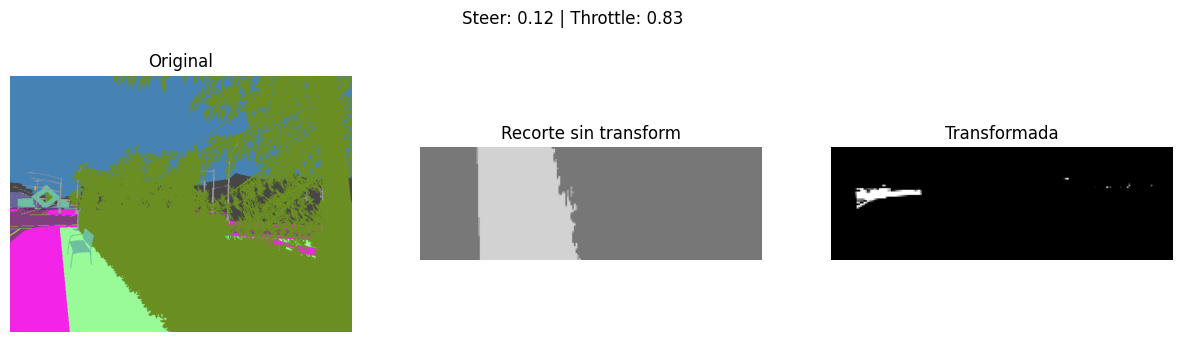

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


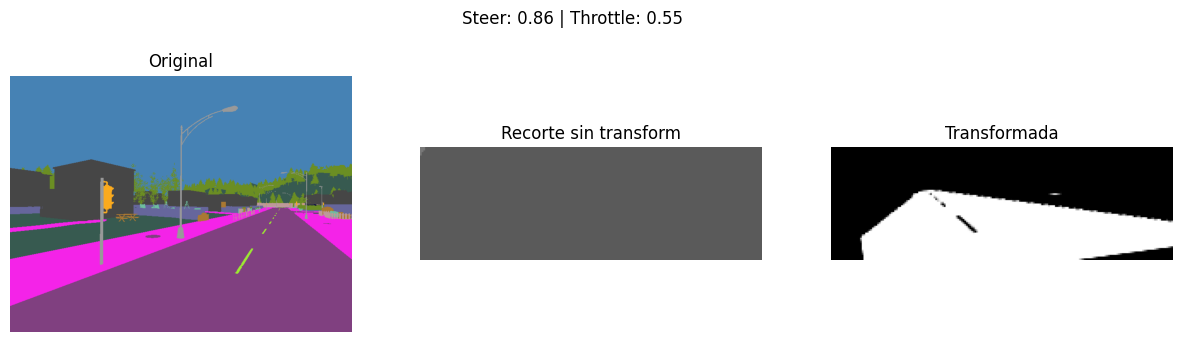

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


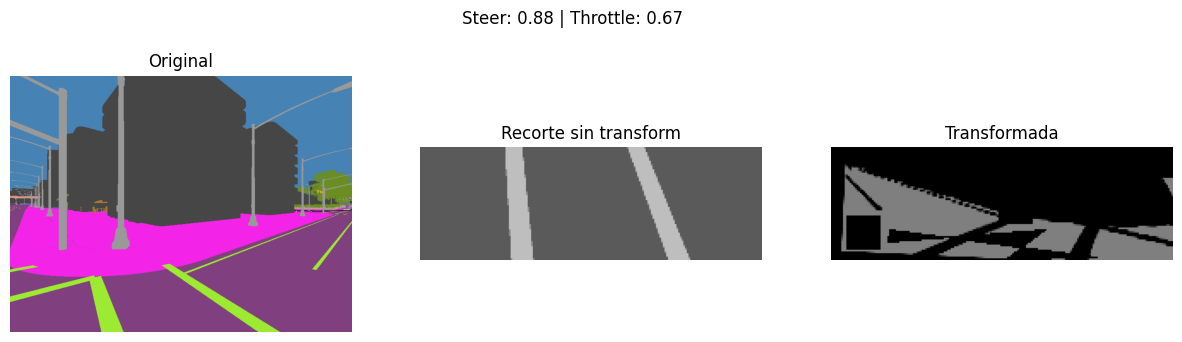

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


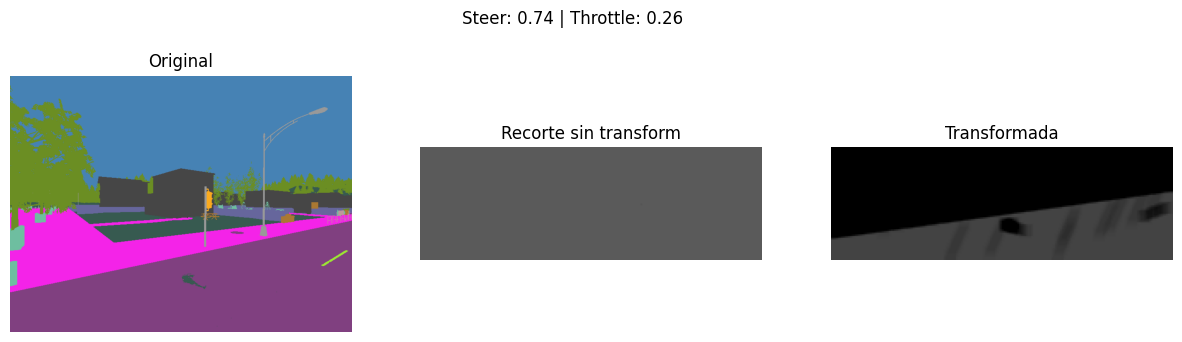

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


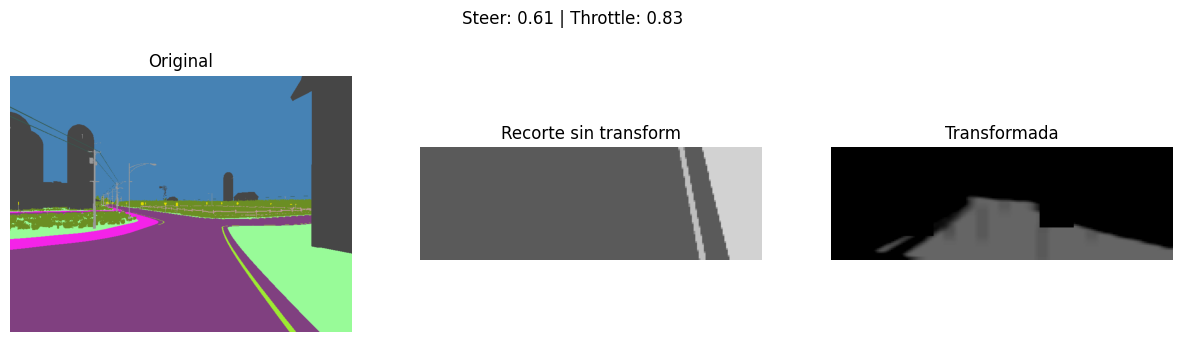

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


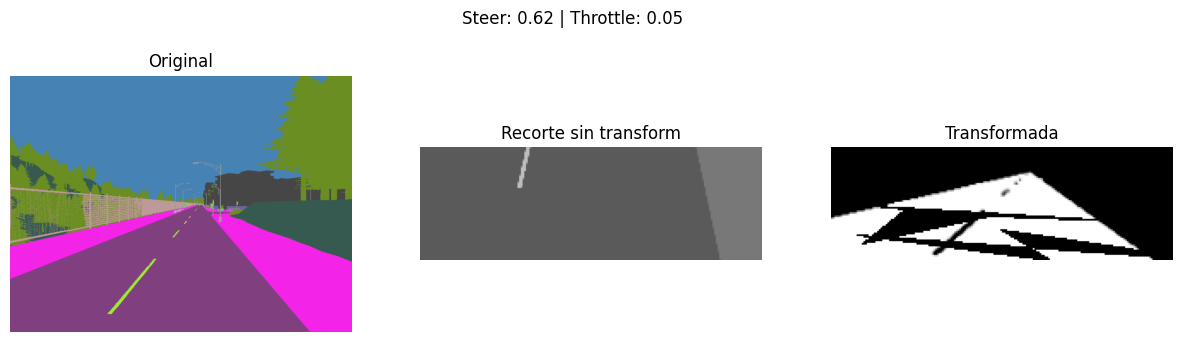

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


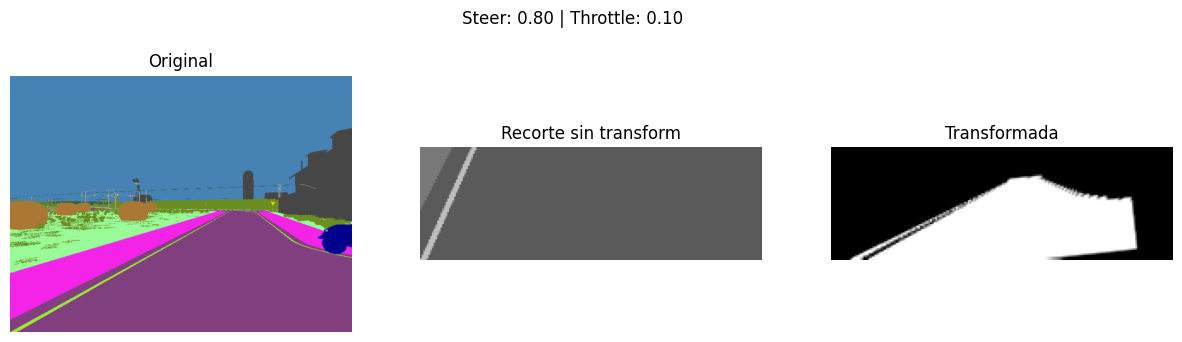

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


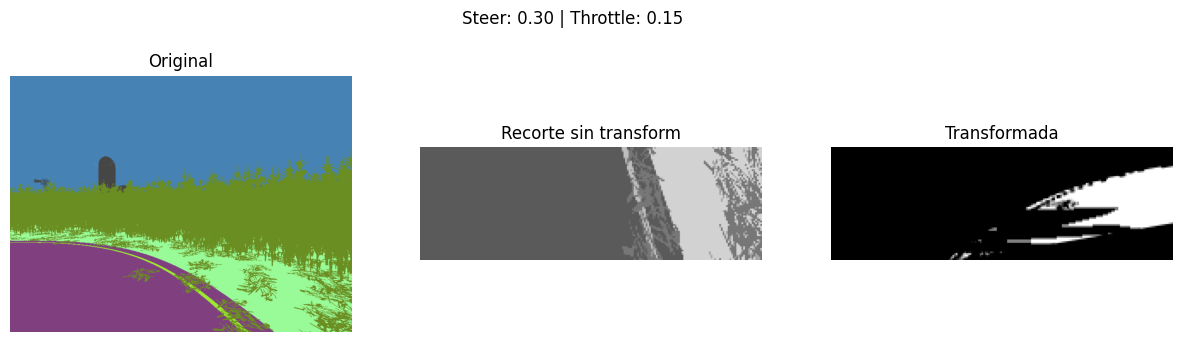

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


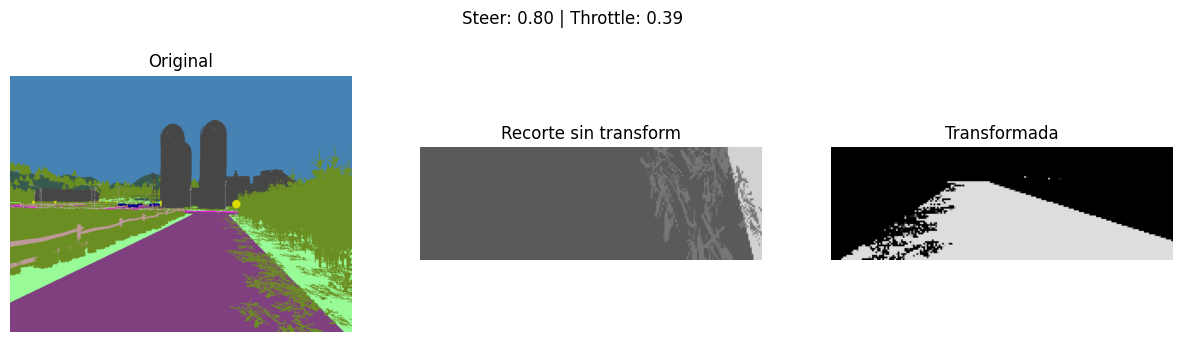

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


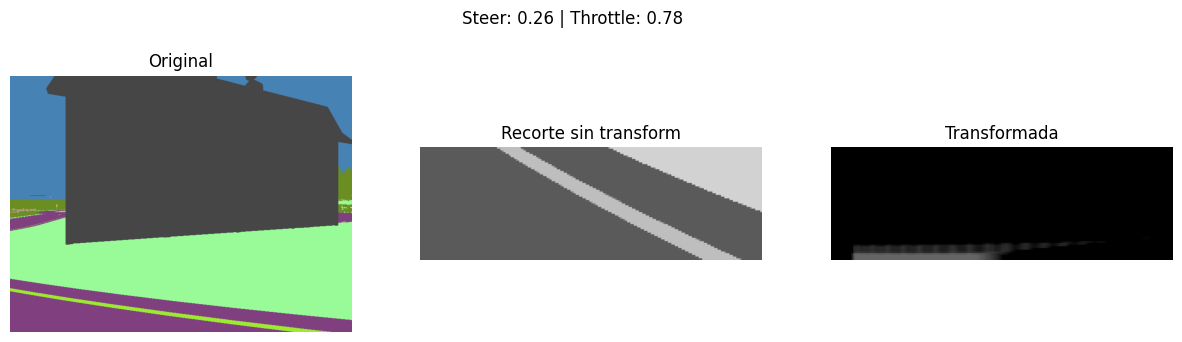

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


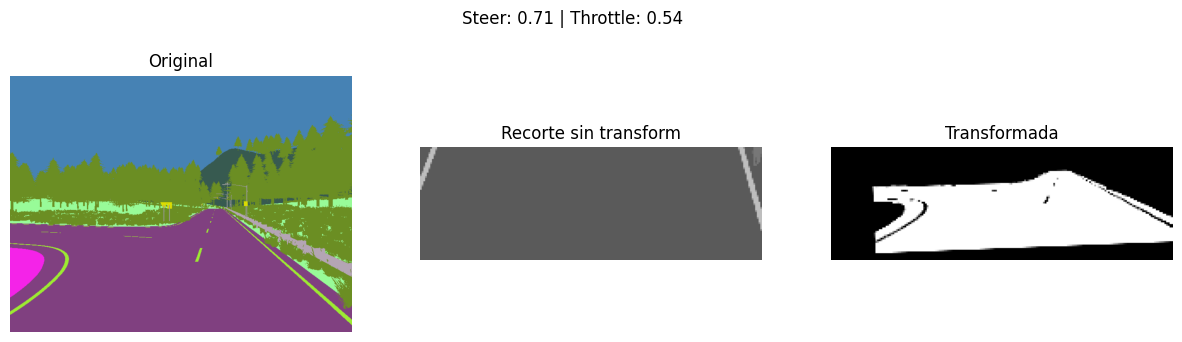

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


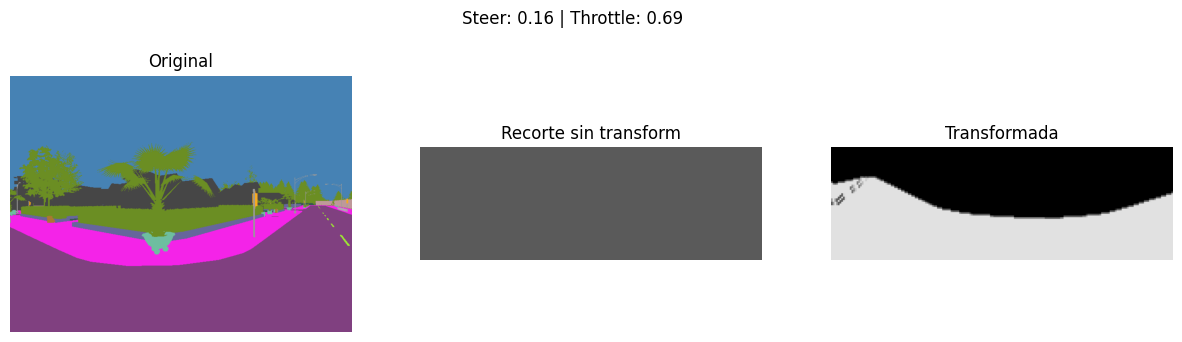

In [17]:
# 📌 Agregar la raíz del proyecto para importar
import sys
sys.path.append("/home/canveo/Projects/pilotnet_torch")

# 📚 Librerías
import pandas as pd
import matplotlib.pyplot as plt
import torch
import random
import cv2
from utils.processing import SegmentedLaneDataset3CH
from utils.transforms_config import train_transform

# 📄 Cargar CSV y seleccionar 5 muestras aleatorias
csv_path = "/home/canveo/Projects/pilotnet_torch/notebooks/dagger_data.csv"
base_path = "/home/canveo/Projects/pilotnet_torch/data"

df = pd.read_csv(csv_path)
df_subset = df.sample(n=15, random_state=42).reset_index(drop=True)

# 🧷 Dataset con transformaciones
dataset = SegmentedLaneDataset3CH(
    df_or_csv=df_subset,
    transform=train_transform,
    base_path=base_path,
    apply_flip=False
)

# 🖼 Mostrar original, recortada y transformada
for i in range(len(dataset)):
    sample = dataset[i]
    if sample is None:
        continue
    image_tensor, label = sample
    image_aug = image_tensor.permute(1, 2, 0).numpy()

    # Leer imagen original
    seg_path = df_subset.iloc[i]["seg_path"]
    full_path = os.path.join(base_path, seg_path)
    original_image = cv2.imread(full_path)
    original_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Recorte tipo PilotNet: parte baja hacia arriba
    cropped = original_image[-66:, :]
    resized = cv2.resize(cropped, (200, 66))
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    no_transform = cv2.merge([gray, gray, gray])  # 3 canales para visualizar

    # 📊 Mostrar lado a lado
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    axs[0].imshow(original_rgb)
    axs[0].set_title("Original")
    axs[0].axis("off")

    axs[1].imshow(no_transform)
    axs[1].set_title("Recorte sin transform")
    axs[1].axis("off")

    axs[2].imshow(image_aug)
    axs[2].set_title("Transformada")
    axs[2].axis("off")

    fig.suptitle(f"Steer: {label[0].item():.2f} | Throttle: {label[1].item():.2f}")
    plt.show()
